In [16]:
! pip install kaggle
! kaggle datasets download Cornell-University/arxiv
! unzip arxiv.zip

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
100%|█████████████████████████████████████▉| 1.15G/1.15G [01:14<00:00, 13.6MB/s]
100%|██████████████████████████████████████| 1.15G/1.15G [01:15<00:00, 16.4MB/s]
Archive:  arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


In [17]:
import json

attributes = ["authors", "title", 'update_date','categories' ]

papers = []
count = 0
with open('arxiv-metadata-oai-snapshot.json') as f:
  for line in f:
    count += 1
    if count % 100000 == 0:
      print(f'on paper {count}')
    json_object = json.loads(line)
    paper = {}
    for attr in attributes:
      paper[attr] = json_object[attr]
    papers.append(paper)

import pandas as pd
df = pd.DataFrame(papers)

df

on paper 100000
on paper 200000
on paper 300000
on paper 400000
on paper 500000
on paper 600000
on paper 700000
on paper 800000
on paper 900000
on paper 1000000
on paper 1100000
on paper 1200000
on paper 1300000
on paper 1400000
on paper 1500000
on paper 1600000
on paper 1700000
on paper 1800000
on paper 1900000
on paper 2000000
on paper 2100000
on paper 2200000


authors  \
0        C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1                          Ileana Streinu and Louis Theran   
2                                              Hongjun Pan   
3                                             David Callan   
4                 Wael Abu-Shammala and Alberto Torchinsky   
...                                                    ...   
2250218  R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...   
2250219  Durga P. Choudhury, Balam A. Willemsen, John S...   
2250220  Balam A. Willemsen, J. S. Derov and S.Sridhar ...   
2250221  Yasumasa Hasegawa (Himeji Institute of Technol...   
2250222  Naoki Enomoto, Masanori Ichioka and Kazushige ...   

                                                     title update_date  \
0        Calculation of prompt diphoton production cros...  2008-11-26   
1                 Sparsity-certifying Graph Decompositions  2008-12-13   
2        The evolution of the Earth-Moon system based o...  2008-01-13   
3        A determinant of Stirling cycle numbers counts...  2007-05-23   
4        From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...  2013-10-15   
...                                                    ...         ...   
2250218  On the origin of the irreversibility line in t...  2009-10-30   
2250219  Nonlinear Response of HTSC Thin Film Microwave...  2016-11-18   
2250220  Critical State Flux Penetration and Linear Mic...  2009-10-30   
2250221  Density of States and NMR Relaxation Rate in A...  2009-10-30   
2250222  Ginzburg Landau theory for d-wave pairing and ...  2009-10-30   

                         categories  
0                            hep-ph  
1                     math.CO cs.CG  
2                    physics.gen-ph  
3                           math.CO  
4                   math.CA math.FA  
...                             ...  
2250218  supr-con cond-mat.supr-con  
2250219  supr-con cond-mat.supr-con  
2250220  supr-con cond-mat.supr-con  
2250221  supr-con cond-mat.supr-con  
2250222  supr-con cond-mat.supr-con  

[2250223 rows x 4 columns]

In [18]:
ai_papers = [paper for paper in papers if ("cs.AI" in paper["categories"] or "stat.ML" in paper["categories"] or "cs.LG" in paper["categories"])]
df = pd.DataFrame(ai_papers)

import re
regex = re.compile(f" and |,")

df["authors"] = [[str(a).strip() for a in regex.split(author) if len(str(a).strip()) > 3] for author in df["authors"]]
df = df.sort_values(by="update_date", ascending=False)

df

authors  \
168839  [Shuting Shen, Xi Chen, Ethan X. Fang, Junwei Lu]   
179649  [Ming-Kun Xie, Jia-Hao Xiao, Gang Niu, Masashi...   
169390    [Alon Albalak, Colin Raffel, William Yang Wang]   
179618              [UngJin Na, Moonhee Choi, HangJin Jo]   
171498  [Soham Rohit Chitnis, Sidong Liu, Tirtharaj Da...   
...                                                   ...   
180173                                  [Petro M. Gopych]   
180172  [Peter D. Turney, Michael L. Littman, Jeffrey ...   
180171  [Peter D. Turney (National Research Council of...   
180170                 [Wolfgang Mayer, Markus Stumptner]   
1                                   [T. Kosel, I. Grabec]   

                                                    title update_date  \
168839  Combinatorial Inference on the Optimal Assortm...  2023-05-05   
179649  Class-Distribution-Aware Pseudo Labeling for S...  2023-05-05   
169390  Improving Few-Shot Generalization by Exploring...  2023-05-05   
179618  Critical heat flux diagnosis using conditional...  2023-05-05   
171498  Domain-Specific Pre-training Improves Confiden...  2023-05-05   
...                                                   ...         ...   
180173  A Neural Network Assembly Memory Model Based o...  2007-05-23   
180172  Combining Independent Modules to Solve Multipl...  2007-05-23   
180171  Measuring Praise and Criticism: Inference of S...  2007-05-23   
180170  Model-Based Debugging using Multiple Abstract ...  2007-05-23   
1       Intelligent location of simultaneously active ...  2007-05-23   

                                 categories  
168839                        stat.ML cs.LG  
179649                                cs.LG  
169390                          cs.LG cs.CL  
179618                physics.flu-dyn cs.LG  
171498                    cs.CV cs.AI cs.LG  
...                                     ...  
180173  cs.AI cs.IR cs.NE q-bio.NC q-bio.QM  
180172                    cs.CL cs.IR cs.LG  
180171                    cs.CL cs.IR cs.LG  
180170                          cs.SE cs.AI  
1                               cs.NE cs.AI  

[181083 rows x 4 columns]

In [12]:
authors_with_papers = {}

for paper in df.values:
    authors = paper[0]
    title = paper[1]
    for author in authors:
        if author in authors_with_papers:
            authors_with_papers[author].append(title)
        else:
            authors_with_papers[author] = [title]

output = pd.DataFrame([{"author": author, "papers": authors_with_papers[author], "paper_count": len(authors_with_papers[author])} for author in authors_with_papers.keys()])

output.sort_values(by="paper_count", ascending=False)

author                                             papers  \
10152       Yoshua Bengio  [Hyena Hierarchy: Towards Larger Convolutional...   
2130             Yang Liu  [Performative Prediction with Bandit Feedback:...   
3403        Sergey Levine  [Offline RL for Natural Language Generation wi...   
4749                Bo Li  [Model Explainability in Physiological and Hea...   
15088   Michael I. Jordan  [Online Learning in Stackelberg Games with an ...   
...                   ...                                                ...   
128610      Igor Khokhlov  [Attacks, Defenses, And Tools: A Framework To ...   
128611   Mehdi Mirakhorli  [Attacks, Defenses, And Tools: A Framework To ...   
128616       Songqing Yue  [Imbalanced Malware Images Classification: a C...   
128619      Zhengren Wang  [Listing Maximal k-Plexes in Large Real-World ...   
267544   Markus Stumptner  [Model-Based Debugging using Multiple Abstract...   

        paper_count  
10152           383  
2130            336  
3403            320  
4749            266  
15088           255  
...             ...  
128610            1  
128611            1  
128616            1  
128619            1  
267544            1  

[267545 rows x 3 columns]

Text(0, 0.5, 'Number of arXiv papers')

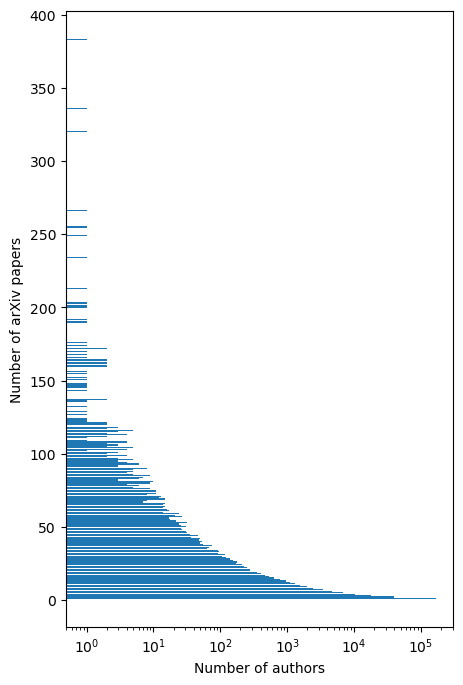

In [14]:
import matplotlib.pyplot as plt
import numpy as np  

plt.figure(figsize=(5, 8))
plt.xscale('log')
count, count_freq = np.unique(output["paper_count"], return_counts=True)
plt.barh(y=count, width=count_freq)
plt.xlabel('Number of authors')
plt.ylabel('Number of arXiv papers')
